In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Part 1
### (a) For lambda = 0, 1, ..., 5000, solve for wRR.

In [3]:
X_train = pd.read_csv("data/hw1-data/X_train.csv", 
                      names = ['cylinders', 'displacement', 'horsepower', 
                               'weight', 'acceleration', 'year made', 'constant'], 
                      index_col=False)
y_train = pd.read_csv("data/hw1-data/y_train.csv", 
                      names = ['miles per gallon'], 
                      index_col=False)

X_test = pd.read_csv("data/hw1-data/X_test.csv", 
                      names = ['cylinders', 'displacement', 'horsepower', 
                               'weight', 'acceleration', 'year made', 'constant'], 
                      index_col=False)
y_test = pd.read_csv("data/hw1-data/y_test.csv", 
                     names = ['miles per gallon'], 
                     index_col=False)

In [3]:
# Standardize features.
for i in range(len(X_train.columns) - 1):
    train_mean = X_train[X_train.columns[i]].mean()
    train_std_mle = np.sqrt(((X_train[X_train.columns[i]] - train_mean) ** 2).sum() / len(X_train[X_train.columns[i]]))
    X_train[X_train.columns[i]] = (X_train[X_train.columns[i]] - train_mean).div(train_std_mle)

    X_test[X_train.columns[i]] = (X_test[X_train.columns[i]] - train_mean).div(train_std_mle)  

In [4]:
def w_RR(X_train, y_train, lamb_min, lamb_max):
    '''
    Input: X_train, y_train, lamb_min, lamb_max
           1. X_train, y_train: training data; matrix
           2. lamb_min: the min of lambda; int
           3. lamb_max: the max of lambda; int
              lamb_min and lamb_max define a range for lambda.
    
    Function: Calculate w_RR for each lambda, which is range from lamb_min to lamb_max.
    
    Output: w_RRs, df
            1. w_RRs: ridge regression solution; a (d x n) dataframe, d: feature dimension, n: number of lambdas' value 
                      (need to be transpose when used)
            2. df: degree of freedom; list
    '''
    
    # Calculate least squares solution
    w_LS = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), 
                         np.transpose(X_train)), y_train)

    U, s, VH = np.linalg.svd(X_train)  # Do Singular Value Decompositions

    w_RRs = pd.DataFrame()  # Create a dataframe to store the w_RRs
    df = []  # Create a list to store dfs

    for lambd in range(lamb_min, lamb_max + 1, 1):
        '''Calculate w_RR and df for each lambda'''
        w_RR = np.dot(np.linalg.inv(lambd*np.linalg.inv(np.dot(np.transpose(X_train), X_train)) 
                                    + np.identity(X_train.shape[1])), w_LS)
        w_RRs[lambd] = pd.Series(np.transpose(w_RR)[0])  # Add w_RR to the dataframe
    
        df_lambd = 0
        for i in range(len(s)):  # Calculate df.
            df_lambd += s[i]*s[i]/(lambd + s[i]*s[i])
        df.append(df_lambd)  # Add df_lambd to the list
    return(w_RRs, df)

In [5]:
# Call function w_RR() to calculate w_RRs and df
w_RRs_o, df = w_RR(X_train.values, y_train.values, 0, 5000)

w_RRs_o = w_RRs_o.T  # Transpose the dataframe
w_RRs_o = w_RRs_o.rename(columns={0: 'cylinders', 1: 'displacement', 2: 'horsepower', 3: 'weight', 
                      4: 'acceleration', 5: 'year made', 6: 'constant'})  # Rename the columns
w_RRs_o['df'] = df  # Add df to the dataframe as a column.

Text(7.2, -5.67, '4')

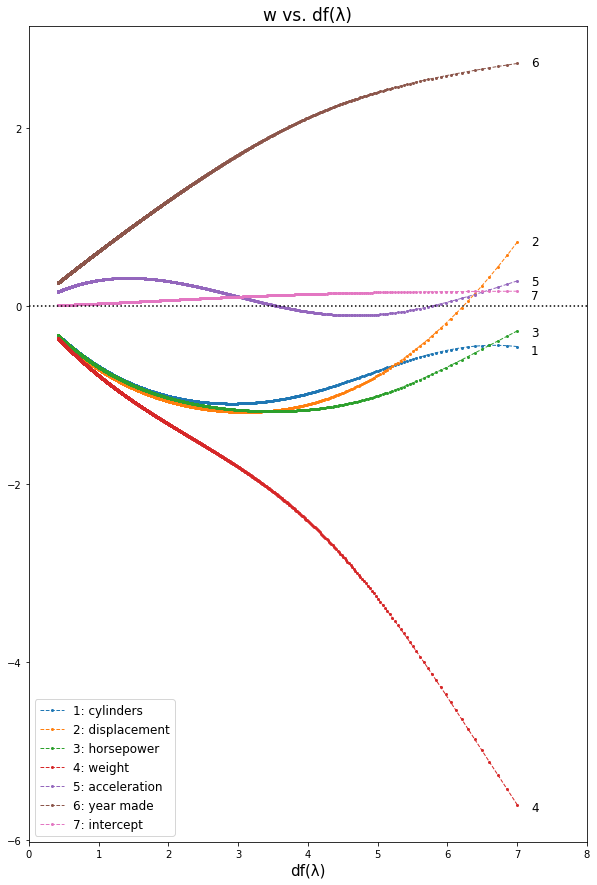

In [6]:
# Plot the figure.
plt.figure(figsize = (10, 15))
plt.plot(w_RRs_o['df'], w_RRs_o['cylinders'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '1: cylinders')
plt.plot(w_RRs_o['df'], w_RRs_o['displacement'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '2: displacement')
plt.plot(w_RRs_o['df'], w_RRs_o['horsepower'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '3: horsepower')
plt.plot(w_RRs_o['df'], w_RRs_o['weight'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '4: weight')
plt.plot(w_RRs_o['df'], w_RRs_o['acceleration'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '5: acceleration')
plt.plot(w_RRs_o['df'], w_RRs_o['year made'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '6: year made')
plt.plot(w_RRs_o['df'], w_RRs_o['constant'], linestyle = '--', marker = 'o', lw = 1, ms = 2, label = '7: intercept')
plt.axhline(y=0, xmin=0, ls = 'dotted', c = 'black')  # Add a horizontal line at y = 0 for the convenience of comparison. 

# Set the attributes of the figure.
plt.xlabel('df(\u03BB)', size = 15)
plt.title('w vs. df(\u03BB)', size = 17)
plt.xlim(0, 8)
plt.legend(loc = 'lower left', fontsize = 12)

# Label the 7 curves by their dimension in X
plt.text(7.2, 2.70, '6', fontsize = 12)
plt.text(7.2, 0.68, '2', fontsize = 12)
plt.text(7.2, 0.24, '5', fontsize = 12)
plt.text(7.2, 0.08, '7', fontsize = 12)
plt.text(7.2, -0.34, '3', fontsize = 12)
plt.text(7.2, -0.54, '1', fontsize = 12)
plt.text(7.2, -5.67, '4', fontsize = 12)

### (c) For lambda = 0, ..., 50, predict all 42 test cases. Plot the root mean squared error (RMSE) on the test set as a function of lambda.

In [7]:
def rmse(X_test, y_test, w_RR):
    '''
    Input: X_test, y_test, w_RR
           1. X_test, y_test: test data; dataframe
           2. w_RR: ridge regression solutions; dataframe
    
    Function: Calculate rmses
    
    Output: lamb, rmses
            1. lamb: value of  lambda; list
            2. rmses: root mean squared error; list
    '''
    
    rmses = []
    lamb = []
    for i in w_RR.index:
        w_RR_i = w_RR.iloc[i].values.reshape(-1, 1)
        y_predict = np.dot(X_test.values, w_RR_i)
        rmse = np.sqrt(np.sum(np.square(y_test.values - y_predict))/42)
        rmses.append(rmse)
        lamb.append(i)
    return(lamb, rmses)

Text(0.5, 1.0, 'RMSE vs. λ (Ridge Regression)')

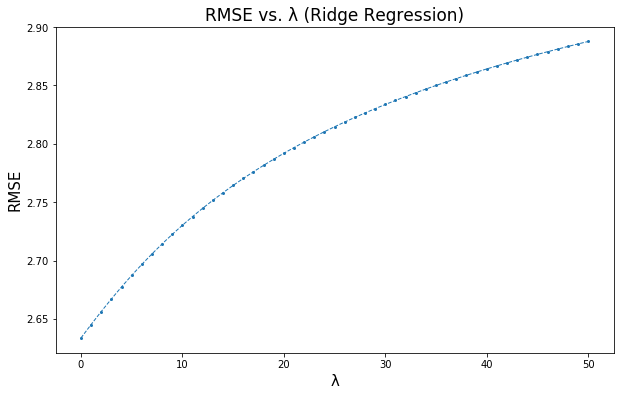

In [8]:
w_RR_51 = w_RRs_o.iloc[:51,:-1]
# Call function rmse().
lamb, rmses = rmse(X_test, y_test, w_RR_51)

# Plot the figure.
plt.figure(figsize = (10, 6))
plt.plot(lamb, rmses, linestyle = '--', marker = 'o', lw = 1, ms = 2)

# Set the attributes of the figure.
plt.xlabel('\u03BB', size = 15)
plt.ylabel('RMSE', size = 15)
plt.title('RMSE vs. \u03BB (Ridge Regression)', size = 17)

### (d) In one figure, plot the test RMSE as a function of lambda = 0, ..., 100 for p = 1, 2, 3.

In [9]:
# 1th-order polynomial regression model
w_RRs_1 = w_RRs_o.iloc[:101,:-1]
# Call function rmse().
lamb_1, rmses_1 = rmse(X_test, y_test, w_RRs_1)

In [10]:
# 2th-order polynomial regression
X_train_2pol = X_train.copy(deep = True)
X_test_2pol = X_test.copy(deep = True)
name2 = ['x1^2', 'x2^2', 'x3^2', 'x4^2', 'x5^2', 'x6^2']


for i in range(len(X_train.columns) - 1):
    # Add columns to X_train_2pol and standardize them.
    X_train_2pol[name2[i]] = X_train_2pol.iloc[:,i] ** 2
    train_mean = X_train_2pol[name2[i]].mean()
    train_std_mle = np.sqrt(((X_train_2pol[name2[i]] - train_mean) ** 2).sum() / len(X_train_2pol[name2[i]]))
    X_train_2pol[name2[i]] = (X_train_2pol[name2[i]] - train_mean).div(train_std_mle)
    # Add columns to X_test_2pol and standardize them.
    X_test_2pol[name2[i]] = X_test_2pol.iloc[:,i] ** 2
    X_test_2pol[name2[i]] = (X_test_2pol[name2[i]] - train_mean).div(train_std_mle)    

# Call function w_RR() to calculate w_RRs and df.
w_RRs_2, df_2 = w_RR(X_train_2pol.values, y_train.values, 0, 100)

w_RRs_2 = w_RRs_2.T  # Transpose the dataframe
w_RRs_2 = w_RRs_2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4', 
                                4: 'x5', 5: 'x6', 6: 'Intercept', 
                                7: 'x1^2', 8: 'x2^2', 9: 'x3^2', 
                                10: 'x4^2', 11: 'x5^2', 12: 'x6^2'})  # Rename the columns

# Call function rmse() to predict test data and calculate RMSE.
lamb_2, rmses_2 = rmse(X_test_2pol, y_test, w_RRs_2)

In [11]:
# 3th-order polynomial regression
X_train_3pol = X_train_2pol.copy(deep = True)
X_test_3pol = X_test_2pol.copy(deep = True)
name3 = ['x1^3', 'x2^3', 'x3^3', 'x4^3', 'x5^3', 'x6^3']

for i in range(len(X_train.columns) - 1):
    # Add columns to X_train_3pol and standardize them.
    X_train_3pol[name3[i]] = X_train_3pol.iloc[:,i] ** 3
    train_mean = X_train_3pol[name3[i]].mean()
    train_std_mle = np.sqrt(((X_train_3pol[name3[i]] - train_mean) ** 2).sum() / len(X_train_3pol[name3[i]]))
    X_train_3pol[name3[i]] = (X_train_3pol[name3[i]] - train_mean).div(train_std_mle)
    # Add columns to X_test_3pol and standardize them.
    X_test_3pol[name3[i]] = X_test_3pol.iloc[:,i] ** 3
    X_test_3pol[name3[i]] = (X_test_3pol[name3[i]] - train_mean).div(train_std_mle)
    
# Call function w_RR() to calculate w_RRs and df.
w_RRs_3, df_3 = w_RR(X_train_3pol.values, y_train.values, 0, 100)

w_RRs_3 = w_RRs_3.T  # Transpose the dataframe
w_RRs_3 = w_RRs_3.rename(columns={0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4', 
                                4: 'x5', 5: 'x6', 6: 'constant', 
                                7: 'x1^2', 8: 'x2^2', 9: 'x3^2', 
                                10: 'x4^2', 11: 'x5^2', 12: 'x6^2',
                                13: 'x1^3', 14: 'x2^3', 15: 'x3^3', 
                                16: 'x4^3', 17: 'x5^3', 18: 'x6^3'})  # Rename the columns

# Call function rmse() to predict test data and calculate RMSE.
lamb_3, rmses_3 = rmse(X_test_3pol, y_test, w_RRs_3)

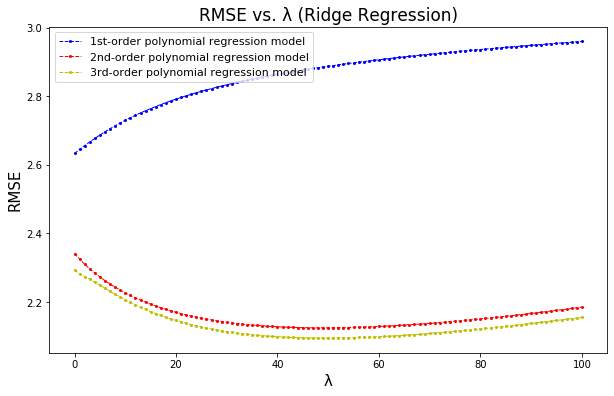

In [12]:
# Plot the figure.
plt.figure(figsize = (10, 6))
plt.plot(lamb_1, rmses_1, linestyle = '--', marker = 'o', c = 'b',  lw = 1, ms = 2, label = '1st-order polynomial regression model')
plt.plot(lamb_2, rmses_2, linestyle = '--', marker = 'o', c = 'r', lw = 1, ms = 2, label = '2nd-order polynomial regression model')
plt.plot(lamb_3, rmses_3, linestyle = '--', marker = 'o', c = 'y', lw = 1, ms = 2, label = '3rd-order polynomial regression model')

# Set the attributes of the figure.
plt.xlabel('\u03BB', size = 15)
plt.ylabel('RMSE', size = 15)
plt.title('RMSE vs. \u03BB (Ridge Regression)', size = 17)
plt.legend(loc = 'upper left', fontsize = 11)
